In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read File
level2_dataset_df = pd.read_csv('/content/Dataset .csv')
level2_dataset_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
level2_dataset_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
level2_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
level2_dataset_df.shape

(9551, 21)

In [ ]:
level2_dataset_df.isna().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


# **Task 1: Restaurant Ratings**

Analyze the distribution of aggregate
ratings and determine the most common
rating range.

Calculate the average number of votes
received by restaurants.

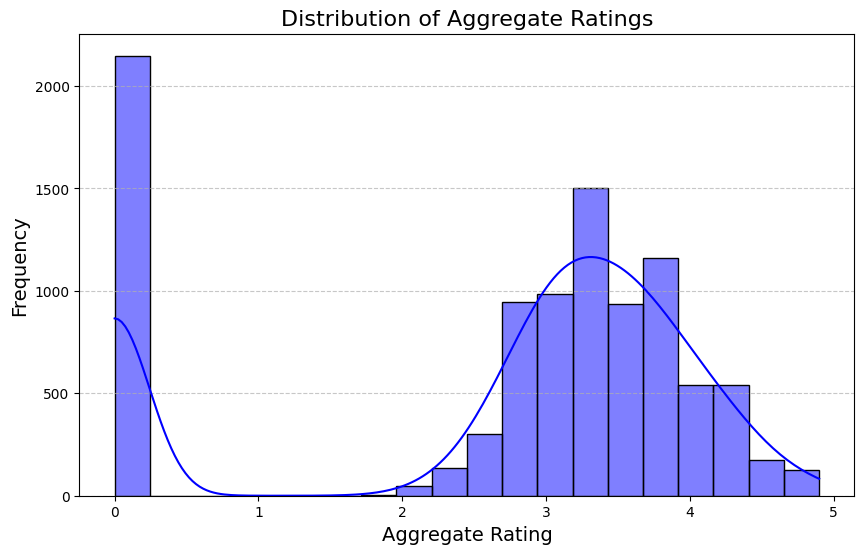

In [ ]:
# Analyze the distribution of aggregate ratings
plt.figure(figsize=(10, 6))
sns.histplot(level2_dataset_df['Aggregate rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Aggregate Ratings', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Most common rating range
Common_rating = level2_dataset_df['Aggregate rating'].value_counts().idxmax()
print("Most common rating range:", Common_rating)

Most common rating range: 0.0


In [ ]:
# Calculate the average number of votes
average_votes = level2_dataset_df['Votes'].mean()
average_votes

156.909747670401

# **Task 2: Cuisine Combination**

Identify the most common combinations of
cuisines in the dataset.

Determine if certain cuisine combinations
tend to have higher ratings.

In [ ]:
#drop null value
level2_dataset_df.dropna(subset=['Cuisines'], inplace=True)


In [ ]:
level2_dataset_df.isna().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [ ]:
#Identify the most common combinations of cuisines in the dataset.
cuisine_comb = level2_dataset_df['Cuisines'].str.split(', ').apply(sorted).apply(', '.join)
most_comm_cus = cuisine_comb.value_counts().head(6)
most_comm_cus

,count
Cuisines,
North Indian,936
"Chinese, North Indian",616
"Mughlai, North Indian",394
Fast Food,354
Chinese,354
"Chinese, Mughlai, North Indian",306


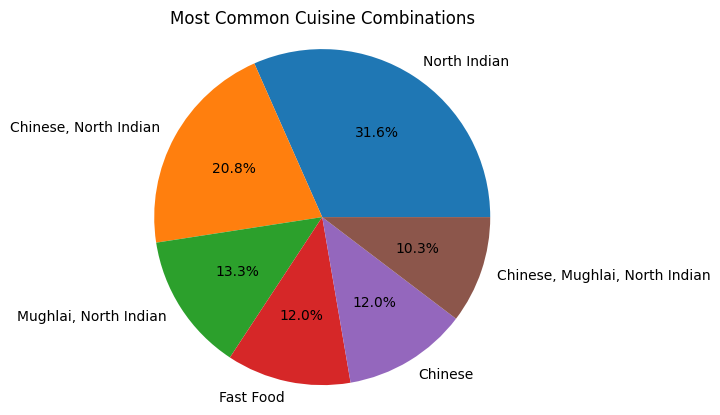

In [ ]:
plt.pie(most_comm_cus, labels=most_comm_cus.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Most Common Cuisine Combinations')
plt.show()

In [ ]:
# Split cuisines into individual components and explode the DataFrame
level2_dataset_df['Cuisines'] = level2_dataset_df['Cuisines'].str.split(',')
exploded_data = level2_dataset_df.explode('Cuisines')
exploded_data['Cuisines'] = exploded_data['Cuisines'].str.strip()

# Create a DataFrame with cuisines and their corresponding ratings
cuisine_ratings_df = exploded_data[['Cuisines', 'Aggregate rating']].dropna()

# Calculate average ratings for each cuisine
average_ratings_by_cuisine = cuisine_ratings_df.groupby('Cuisines')['Aggregate rating'].mean()
top_high_rated_cuisines = average_ratings_by_cuisine.nlargest(10)
print(top_high_rated_cuisines)


Cuisines
Sunda         4.900000
B�_rek        4.700000
Taiwanese     4.650000
Ramen         4.500000
Dim Sum       4.466667
Hawaiian      4.412500
Bubble Tea    4.400000
D�_ner        4.400000
Curry         4.400000
Kebab         4.380000
Name: Aggregate rating, dtype: float64


# **Task 3 : Geographic Analysis**

Plot the locations of restaurants on a
map using longitude and latitude
coordinates.

Identify any patterns or clusters of
restaurants in specific areas.

In [ ]:
fig = px.scatter_mapbox(level2_dataset_df, lat="Latitude", lon="Longitude", hover_data=["City","Cuisines","Restaurant Name"], color="City", zoom=0.25, height=600)
fig.update_layout(mapbox_style='carto-darkmatter')
fig.show()

In [ ]:
#Identify any patterns or clusters of restaurants in specific areas.
map = folium.Map(location=[level2_dataset_df['Latitude'].mean(), level2_dataset_df['Longitude'].mean()], zoom_start=2 , height = '75%' , width = '100%')

heat_data = [[row['Latitude'], row['Longitude']] for index, row in level2_dataset_df.iterrows()]
HeatMap(heat_data, radius=15).add_to(map)
map

# **Task 4: Restaurant Chains**

Identify if there are any restaurant chains
present in the dataset.

Analyze the ratings and popularity of
different restaurant chains.

In [ ]:
#Identify if there are any restaurant chains present in the dataset.
restaurant_chains = level2_dataset_df['Restaurant Name'].value_counts()
chains_d = restaurant_chains[restaurant_chains > 1].index
chains_d

Index(['Cafe Coffee Day', 'Domino's Pizza', 'Subway', 'Green Chick Chop',
       'McDonald's', 'Keventers', 'Pizza Hut', 'Giani', 'Baskin Robbins',
       'Barbeque Nation',
       ...
       'Nazeer Delicacies', 'Embassy', 'Delhi Biryani Hut',
       'Qureshi Kabab Corner', 'KC Bakers', 'Zaika Kathi Rolls',
       'The Night Owl', 'The Cheesecake Factory', 'New Kadimi',
       'Ceviche Tapas Bar & Restaurant'],
      dtype='object', name='Restaurant Name', length=734)

In [ ]:
chains_data = level2_dataset_df[level2_dataset_df['Restaurant Name'].isin(chains_d)]
chain_analysis = chains_data.groupby('Restaurant Name').agg({
    'Aggregate rating': ['mean', 'max', 'min'],
    'Votes': ['sum', 'mean']
}).reset_index()

chain_analysis.columns = ['Restaurant Name', 'Avg Rating', 'Max Rating', 'Min Rating', 'Total Votes', 'Avg Votes']
chain_analysis.sort_values(by='Avg Rating', ascending=False, inplace=True)
chain_analysis.head()

,Restaurant Name,Avg Rating,Max Rating,Min Rating,Total Votes,Avg Votes
629,Talaga Sampireun,4.900,4.9,4.9,5514,1838.0
589,Silantro Fil-Mex,4.850,4.9,4.8,1364,682.0
8,AB's Absolute Barbecues,4.850,4.9,4.8,3151,1575.5
7,AB's - Absolute Barbecues,4.825,4.9,4.6,13400,3350.0
449,Naturals Ice Cream,4.800,4.9,4.7,3094,1547.0


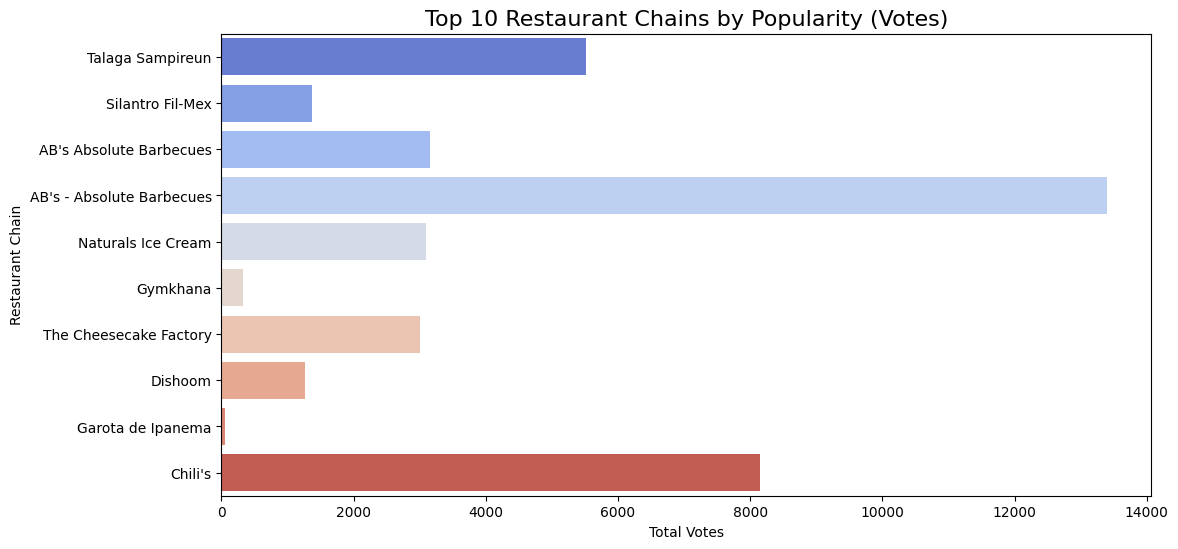

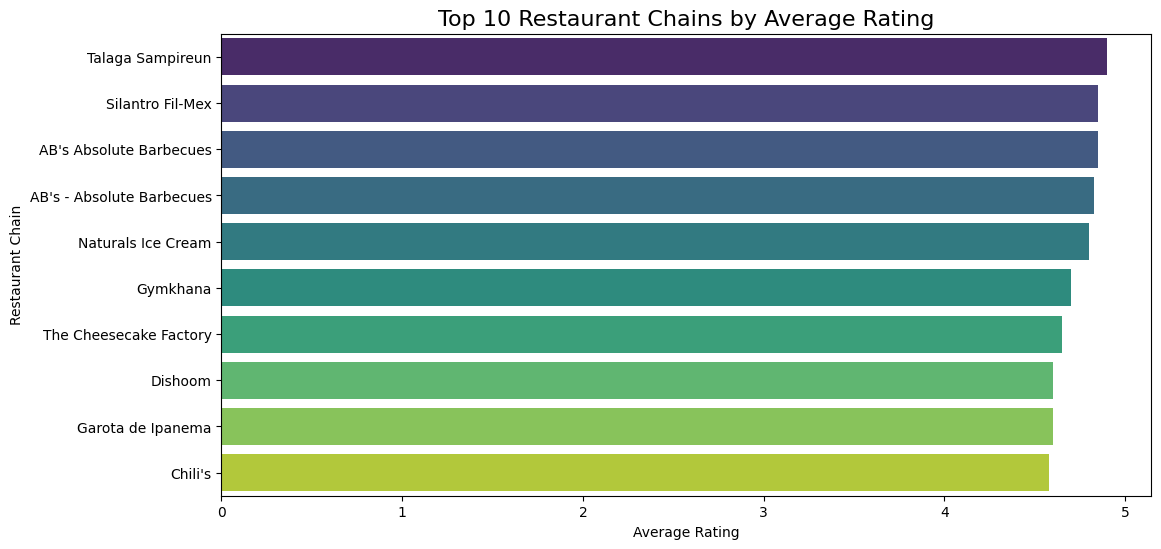

In [ ]:
top_chains = chain_analysis.head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Total Votes",
    y="Restaurant Name",
    data=top_chains,
    palette="coolwarm",
)
plt.title("Top 10 Restaurant Chains by Popularity (Votes)", fontsize=16)
plt.xlabel("Total Votes")
plt.ylabel("Restaurant Chain")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Avg Rating",
    y="Restaurant Name",
    data=top_chains,
    palette="viridis",
)
plt.title("Top 10 Restaurant Chains by Average Rating", fontsize=16)
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Chain")
plt.show()
